# 用basemap可视化地理数据

In [125]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from itertools import chain

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


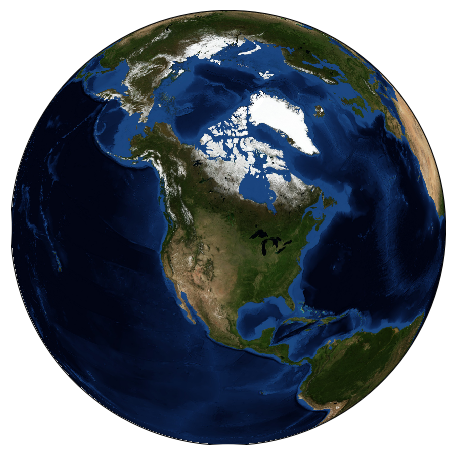

In [126]:
plt.figure(figsize=(8,8))
m=Basemap(projection='ortho',resolution=None,lat_0=50,lon_0=-100)
m.bluemarble(scale=0.5)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(2.34727e+06,4.51808e+06,'Scattle')

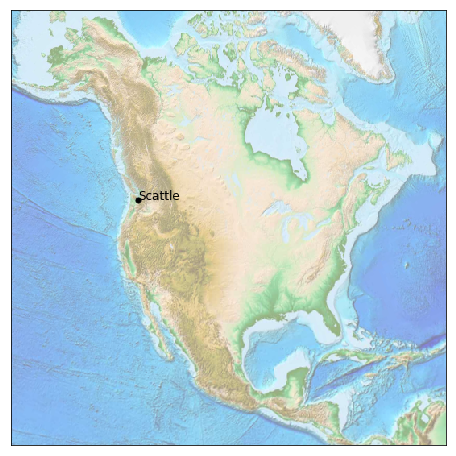

In [127]:
fig=plt.figure(figsize=(8,8))
m=Basemap(projection='lcc',resolution=None,width=8E6,height=8E6,lat_0=45,lon_0=-100)
m.etopo(scale=0.5,alpha=0.5)
x,y=m(-122.3,47.6)
plt.plot(x,y,'ok',markersize=5)
plt.text(x,y,'Scattle',fontsize=12)

### 地图投影

In [128]:
#定义一个可以画经纬线地图的方法
def draw_map(m,scale=0.2):
    m.shadedrelief(scale=scale)
    
    #m.drawcoastlines()
    #m.drawlsmask()
    lats=m.drawparallels(np.linspace(-90,90,13))
    lons=m.drawmeridians(np.linspace(-100,100,13))
    
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    for line in all_lines:
        line.set(linestyle='--',alpha=0.3,color='w')

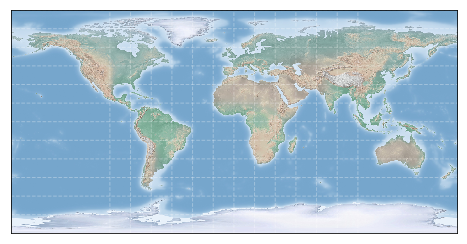

In [129]:
#圆柱投影
fig=plt.figure(figsize=(8,6),edgecolor='w')
m=Basemap(projection='cyl',resolution=None,llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180)#上方维度，下方纬度，左边经度，右边经度
draw_map(m)

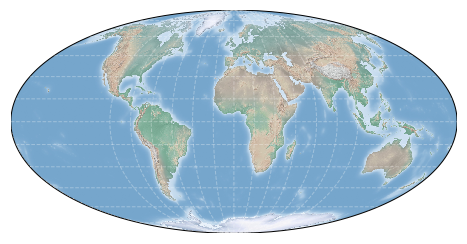

In [130]:
#伪圆柱投影
fig=plt.figure(figsize=(8,6),edgecolor='w')
m=Basemap(projection='moll',resolution=None,lat_0=0,lon_0=0)#中心纬度，中心经度
draw_map(m)

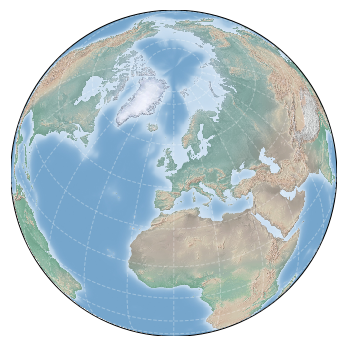

In [131]:
#透视投影
fig=plt.figure(figsize=(8,6),edgecolor='w')
m=Basemap(projection='ortho',resolution=None,lat_0=50,lon_0=0)
draw_map(m)

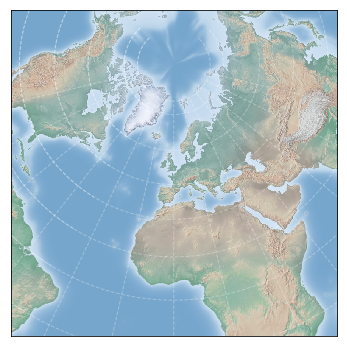

In [132]:
#圆锥投影
fig=plt.figure(figsize=(8,6),edgecolor='w')
m=Basemap(projection='lcc',resolution=None,lat_0=50,lon_0=0,lat_1=45,lat_2=55,width=1.6E7,height=1.6E7)
draw_map(m)

In [1]:
#天空岛海岸线示例
fig,ax=plt.subplots(1,2,figsize=(12,8))
for i,res in enumerate(['l','h']):
    m=Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2,width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color="#FFDDCC",lake_color="#DDEEFF")
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    print(i)
    print(res)
    ax[i].set_title("resolution='{0}'".format(res))

NameError: name 'plt' is not defined

### 在地图上画数据

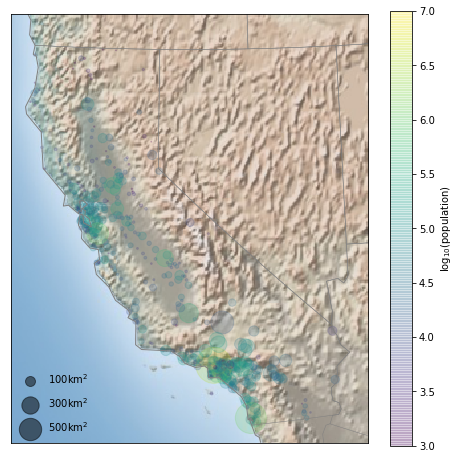

In [141]:
'''
contour() / contourf()
绘制等高线 / 填充等高线
imshow()
绘制一个图像
pcolor() / pcolormesh()
绘制带规则 / 不规则网格的伪彩图（pseudocolor plot）
plot()
绘制线条和 / 或标签
scatter()
绘制带标签的点
quiver()
绘制箭头
barbs()
绘制风羽（wind barb）
drawgreatcircle()
绘制大圆圈
'''
# 美国加州城市数据
import pandas as pd
cities=pd.read_csv('datas/california_cities.csv')
#print(cities)
lat=cities['latd'].values
lon=cities['longd'].values
population=cities['population_total'].values
area=cities['area_total_km2'].values
fig=plt.figure(figsize=(8,8))
m = Basemap(projection='lcc', resolution='l',
lat_0=37.5, lon_0=-119,
width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.scatter(lon,lat,latlon=True,c=np.log10(population),s=area,cmap='viridis',alpha=0.2)
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3,7)
for a in [100,300,500]:
    plt.scatter([],[],c='k',alpha=0.5,s=a,label=str(a)+'km$^2$')
plt.legend(scatterpoints=1,frameon=False,labelspacing=1,loc='lower left' )   
